In [1]:
#install and import libraries
import sys

!conda install --yes --prefix {sys.prefix} -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from Functions import *

Solving environment: ...working... done

# All requested packages already installed.



C:\Users\frank\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#read in NFL combine WR file
file = '..\\Data\\NFL_Combine_WR.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Ht,Wt,Forty,Vertical
Player,,,,
Plaxico Burress,77,231,4.59,33.0
Kwame Cavil,74,208,4.54,39.5
Chris Cole,72,191,4.37,37.5
Chris Coleman,72,211,4.61,32.5
Laveranues Coles,71,192,4.41,34.0


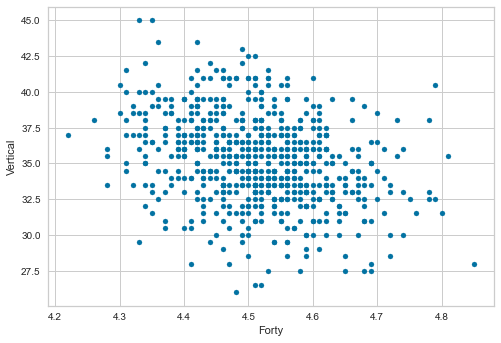

In [3]:
#plot dataset
graph_display(X = df.Forty, y= df.Vertical, labelX='Forty', labely='Vertical')

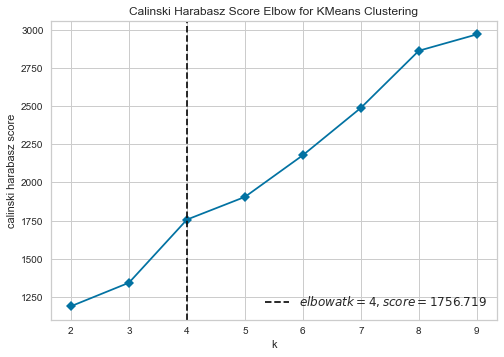

In [4]:
#determine kmeans groups
kmeans_groups(min=2, max=10, df = df[['Forty', 'Vertical']])

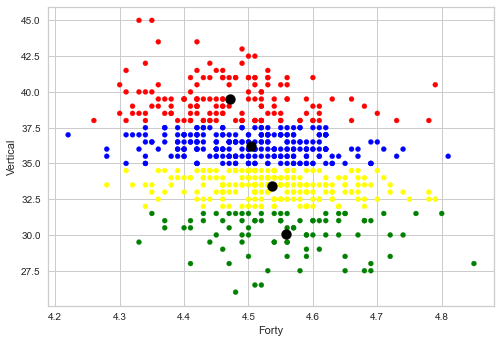

In [6]:
#4 groupings were deemed appropriate based on the score about
#plot kmeans groups
k_means, y_hat = kmeans_clust (n_clusters=4, df=df[['Forty', 'Vertical']])


df['Predict_FortyVertical'] = y_hat

LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'yellow',
                   2: 'blue',
                   3: 'green'
                   }


label_color = [LABEL_COLOR_MAP[l] for l in y_hat]
cl_centers = k_means.cluster_centers_

graph_display(X = df.Forty, y= df.Vertical, labelX='Forty', labely='Vertical', pred=label_color, c1X=cl_centers[:, 0], c1y=cl_centers[:, 1])
